# Importing the necessary libraries

In [1]:

%pip install tensorflow opencv-python mediapipe sklearn matplotlib
#here thre skleasrn is use for doing the tasks related to confusion matrix,accuracy and laoding of the diiferent models which we gonna use.
#matplotlib is for visualisation related tasks.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2#cv2 (OpenCV): This library is used for computer vision tasks. It provides functions for image and video processing, such as reading and manipulating images, as well as accessing video streams from webcams or files. In a sign language action detection system, OpenCV can be used for tasks like capturing video frames, preprocessing images, and detecting hand gestures.
import numpy as np#NumPy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently. In the context of sign language action detection, NumPy can be utilized for handling image data efficiently, performing numerical operations, and managing data structures.
import os#The os module provides a way to interact with the operating system. It is commonly used for tasks such as file and directory manipulation. In your case, it might be used for tasks like accessing directories containing training data or saving the results of your sign language action detection system.
from matplotlib import pyplot as plt#Matplotlib is a plotting library for Python. It provides functions for creating static, animated, and interactive visualizations in Python. While it might not be directly related to the core functionality of a sign language action detection system, it can be helpful for visualizing data, such as displaying images or plotting performance metrics during model training or evaluation.
import time#The time module provides various time-related functions. It can be used for tasks such as measuring the execution time of certain operations, implementing delays, or timestamping events. In your system, it might be used for timing certain processes or adding time-related functionalities.
import mediapipe as mp#MediaPipe is an open-source framework developed by Google that provides solutions for building multimodal (e.g., audio, video) applied machine learning pipelines. It offers pre-trained models and tools for various tasks, including hand tracking, pose estimation, object detection, and more. In a sign language action detection system, the mediapipe library is likely used for hand tracking and possibly other tasks related to hand or body pose estimation, which are essential for interpreting sign language gestures.

# Key points finding using MediaPipe Holistic

In [3]:
#now we here are making two variables = 
mp_holistic = mp.solutions.holistic # Holistic model =  this is for downloading the model and leveraging the model.
mp_drawing = mp.solutions.drawing_utils # Drawing utilitiestaking = this is for drawing the keypoints on the face.

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB = MediaPipe models typically expect input images in RGB format, so this conversion ensures compatibility.
    image.flags.writeable = False                  # Image is no longer writeable = This is done because the MediaPipe model's process method might modify the input image in-place. Disabling write access prevents accidental modification of the input image.
    results = model.process(image)                 # Make prediction = The process method analyzes the input image and returns the results of the detection, such as the coordinates of detected landmarks or other relevant information depending on the specific model being used.
    image.flags.writeable = True                   # Image is now writeable = This allows you to modify the image if needed after the detection process.
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR = This conversion is necessary if you plan to display or save the image using OpenCV, which typically uses BGR format for image representation.
    return image, results

#why we are enabling writable flags true and false = 
#writable flag is like a safety measure that prevents accidental changes to the input image during the detection process. 
#When we set image.flags.writeable = False, it's like putting a lock on the image to say, "Hey, don't let anything modify this image accidentally!" Then, after the detection is done, we unlock the image by setting image.flags.
#writeable = True, allowing us to make changes to it if needed. This helps prevent unexpected errors and ensures that the image remains intact for further processing after detection.

In [5]:
#this function is made for visualization aspect of drawing landmarks and connections on an image
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
# mp_drawing.draw_landmarks is a function from the MediaPipe drawing utilities module (mp_drawing). It is used to draw landmarks and connections on an image.
# image: The input image on which the landmarks and connections will be drawn.
# results.face_landmarks: The detected facial landmarks obtained from the results parameter.
# mp_holistic.FACE_CONNECTIONS: This specifies the connections between facial landmarks. It's likely a predefined constant that defines the connections between different facial landmarks.
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [7]:
mp_drawing.draw_landmarks??

Signature:
mp_drawing.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec], NoneType] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
    is_drawing_landmarks: bool = True,
)
Source:   
def draw_landmarks(
    image: np.ndarray,
    landmark_list: landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Optional[
        Union[DrawingSpec, Mapping[int, DrawingSpec]]
    ] = DrawingSpec(color=RED_

In [8]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [10]:
cam = cv2.VideoCapture(0)# 0 specifies for the default webcam. if you have multiple webcames connected then use (1).
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:#creating an instance of the Holistic model with specified confidence thresholds for detection and tracking. The with statement ensures that the resources used by the Holistic model are properly released after its use.
    while cam.isOpened():
        ret,frame = cam.read()##ready to capture singlt frame from the cam.
        # Make detections
        image, results = mediapipe_detection(frame, holistic)#It performs detection using the Holistic model on the frame and returns the processed image image and the detection results results.

        print(results)
        
        #Draw landmarks
        draw_styled_landmarks(image, results)#This line draws styled landmarks on the processed image image based on the detection results results. It visualizes the detected landmarks on the image.
    
        cv2.imshow("opencv's feed",image)
        if cv2.waitKey(10) & 0xFF == ord('q'):# if you want to stop the webcam then use (q)key of tyhe keyboard
            break
    cam.release()#release the webcam and clean up any resources
    cv2.destroyAllWindows()#destroys all OpenCV windows that are currently open.

C:\Users\dhruv\AppData\Roaming\Python\Python311\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

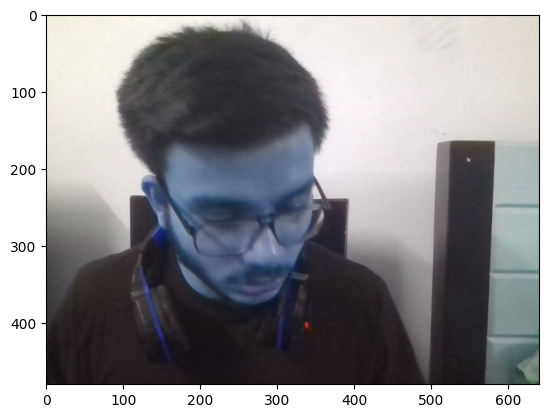

In [11]:
plt.imshow(frame)

In [12]:
results.face_landmarks#likely to access the face landmarks detected by the MediaPipe Holistic model during the processing of an image or a frame of a video.

landmark {
  x: 0.444184452
  y: 0.725834787
  z: 0.00598873291
}
landmark {
  x: 0.454761565
  y: 0.696289659
  z: -0.0496865325
}
landmark {
  x: 0.446237832
  y: 0.695943236
  z: -0.0107820528
}
landmark {
  x: 0.437622219
  y: 0.635172606
  z: -0.0639533252
}
landmark {
  x: 0.455651432
  y: 0.683839679
  z: -0.0603065491
}
landmark {
  x: 0.453346461
  y: 0.658705771
  z: -0.0660514235
}
landmark {
  x: 0.442835122
  y: 0.581164896
  z: -0.0681369081
}
landmark {
  x: 0.333818972
  y: 0.552245855
  z: -0.0464589149
}
landmark {
  x: 0.438391685
  y: 0.526380539
  z: -0.0833862498
}
landmark {
  x: 0.437838286
  y: 0.503207743
  z: -0.0985194147
}
landmark {
  x: 0.430395961
  y: 0.398521245
  z: -0.1341746
}
landmark {
  x: 0.443585783
  y: 0.7322855
  z: 0.0111037418
}
landmark {
  x: 0.442413568
  y: 0.736429214
  z: 0.0175976399
}
landmark {
  x: 0.440977931
  y: 0.737122
  z: 0.0247448776
}
landmark {
  x: 0.440796971
  y: 0.740919292
  z: 0.0357341394
}
landmark {
  x: 0.4413

In [13]:
len(results.face_landmarks.landmark)#determine the number of facial landmarks detected by the MediaPipe Holistic model in the current frame or image.
#IMPORTANT = 
#  If the length is greater than zero, it indicates that the model successfully detected facial landmarks. 
# You can then proceed with further analysis or actions based on this information. 
# Conversely, if the length is zero, it suggests that no facial landmarks were detected, which may prompt you to handle this scenario accordingly, such as displaying an error message or retrying the detection process.

468

In [15]:
len(results.pose_landmarks.landmark)

33

In [16]:
draw_landmarks(frame, results)

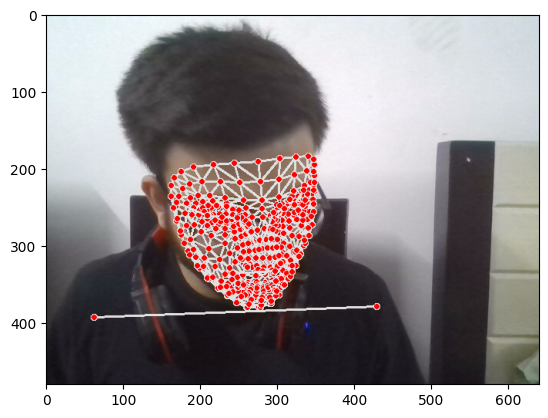

In [17]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Now comes the part of extracting the key points

In [18]:
# len(results.left_hand_landmarks.landmark)#in this we get error because rught we have none left hand landmareks as well AS RIGHT HAND LANDMARKS
#if we want values of left and right hand landmarks we have to basically show in the webcam.

len(results.pose_landmarks.landmark)#HERE WE DID'NT GET ERROR BECAUSE RIGHT NOW WE HAVE IMFO ABOUT FACE AND POSE LANDMARKS VALUES.


33

In [19]:
len(results.face_landmarks.landmark)

468

In [20]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)
#imformation  = 
# These lines of code appear to iterate over the pose landmarks detected by the MediaPipe Holistic model and store their coordinates along with visibility information into a list named pose. Here's the use case of these lines in building your project:

# Data extraction: The loop iterates over each pose landmark detected in the current frame's results (results.pose_landmarks). For each landmark, it extracts the X, Y, and Z coordinates along with visibility information (res.x, res.y, res.z, res.visibility).

# Data storage: The extracted landmark information is stored in a structured format. Each landmark's coordinates and visibility information are encapsulated into a numpy array (test) and appended to the pose list.

# Feature representation: By storing the pose landmarks along with visibility information, you capture not only the spatial location of each landmark but also whether the landmark was visible in the frame. This can be important for downstream tasks such as gesture recognition, where the visibility of certain landmarks might influence the interpretation of the pose.

# Data aggregation: The pose list aggregates all the pose landmarks and their associated information for the current frame. This aggregated data can be further processed, analyzed, or fed into machine learning models for tasks such as action recognition, pose estimation, or gesture classification.

In [21]:
# now we are gonna see the landmarks values in form of different coordinates = 
results.pose_landmarks.landmark[0]

x: 0.43272382
y: 0.636260211
z: -1.34879184
visibility: 0.999802291

In [22]:
# results.pose_landmarks.landmark[0].x#values in x coordinate
# results.pose_landmarks.landmark[0].y#values in y coordinate
# results.pose_landmarks.landmark[0].z#values in z coordinate
results.pose_landmarks.landmark[0].visibility#values in visibility coordinate

0.99980229139328

In [23]:
pose

[array([ 0.43272382,  0.63626021, -1.34879184,  0.99980229]),
 array([ 0.46098503,  0.53731793, -1.34814274,  0.99964756]),
 array([ 0.48286039,  0.52609122, -1.34779572,  0.99960506]),
 array([ 0.50356942,  0.51495087, -1.3479985 ,  0.99960679]),
 array([ 0.38835576,  0.55042464, -1.36465812,  0.99973404]),
 array([ 0.35703993,  0.54878777, -1.36354613,  0.99969369]),
 array([ 0.32673791,  0.54428798, -1.3635962 ,  0.9997099 ]),
 array([ 0.52304626,  0.47626501, -0.98935449,  0.99962276]),
 array([ 0.26477259,  0.50890082, -1.03958893,  0.99981743]),
 array([ 0.46474656,  0.69468701, -1.17977667,  0.99986595]),
 array([ 0.3785595 ,  0.70092088, -1.19331908,  0.99990064]),
 array([ 0.67048579,  0.79025108, -0.63315141,  0.99943626]),
 array([ 0.09826142,  0.82014072, -0.68269914,  0.99952924]),
 array([ 0.75840908,  1.21916199, -0.23024812,  0.23013112]),
 array([ 0.051987  ,  1.33622229, -0.26568353,  0.43906361]),
 array([ 0.72067493,  1.59922957, -0.08262195,  0.05444113]),
 array([

In [24]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten()

In [25]:
pose.shape

(132,)

In [26]:
# now we are doing same thing which we done earlier for other one's = 

In [27]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
#(4 values per landmark * 33 landmarks) WHEN WE FLATTEN 33 LANDMARK.
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
# length 1404 (3 values per landmark * 468 landmarks).
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

#in every statement we use if else because if we don't use or show the right hand or left hand we did'nt get any sort of error. we actually get zeroe value in the array according to that landmark.


In [28]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [29]:
result_test = extract_keypoints(results)

In [30]:
result_test

array([ 0.43272382,  0.63626021, -1.34879184, ...,  0.        ,
        0.        ,  0.        ])

In [31]:
np.save("0",result_test)

# NOW WE ARE GONNA BE SETTING UP OUR FOLDERS FOR COLLECTION

In [32]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])#By defining the actions beforehand, you establish the classes that your system will learn to detect and classify. This array provides a mapping between the numeric labels and the corresponding action names.

# Thirty videos worth of data
no_sequences = 30#specifies the number of sequences (or video samples) you want to collect for each action.
                 #In this case, you're planning to collect 30 video sequences for each sign language gesture.

# Videos are going to be 30 frames in length
sequence_length = 30#This line defines the length of each video sequence in terms of the number of frames.
                    #Each video sequence will consist of 30 frames.

In [33]:
for action in actions:#actions contains ['hello', 'thanks', 'iloveyou'], this loop will iterate over each of these actions.
    for sequence in range(no_sequences):#his loop iterates over a range of numbers from 0 to no_sequences - 1.
#This loop is responsible for creating a specific number of sequences (or video samples) for each action.
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# ITS TIME FOR COLLECTING THE KEYPOINT VALUES FROM TRAINING AND TESTING PART.

In [34]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions: #LOOPING THROW THE SELECTED ACTIONS
        # Loop through sequences aka videos
        for sequence in range(no_sequences): #LOOPING THROW 30 FRAMES OF KEYPOINTS PER FRAME
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                #COLLECTION BREAKS = NOW WE GONNA INTRODUCE THE BREAKS, HAVING BREAKS BETWEEN EACH SEQUENCE COLLECTION Allows you to reset anf reposition yourself to collect action from start to finish.
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)#break is of 2 seconds
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)#After detecting landmarks in each frame, it extracts the keypoints representing the detected landmarks.
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)#Each numpy array contains the landmark coordinates and other relevant information for a specific frame.

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):#It listens for the 'q' key press and breaks out of the loop gracefully if the user decides to stop data collection.
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# PREPROCESSING OF DATA AND CREATING LABELS AND FEATURES

In [35]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical#The to_categorical function is commonly used in machine learning, specifically in classification tasks. It converts integer class labels (e.g., 0, 1, 2) into a one-hot encoded format, which is often required by neural network models for training.

In [36]:
label_map = {label:num for num, label in enumerate(actions)}
#The typical use case for this line of code is in situations where you need to convert a list of categorical labels into a format that can be easily used for machine learning algorithms. Machine learning models often require labels to be in numerical format rather than categorical strings.

In [37]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [38]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [39]:
np.array(sequences).shape

(90, 30, 1662)

In [40]:
np.array(labels).shape

(90,)

In [41]:
X = np.array(sequences)

In [42]:
X.shape

(90, 30, 1662)

In [43]:
y = to_categorical(labels).astype(int)


In [44]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [46]:
y_test.shape

(5, 3)

# Building and training our LSTM Neural Network model

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam

In [95]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [124]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))



In [125]:
res = [.7, 0.2, 0.1]

In [126]:
actions[np.argmax(res)]

'hello'

In [127]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [117]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - categorical_accuracy: 0.2702 - loss: 1.1702
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - categorical_accuracy: 0.3288 - loss: 1.1303
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - categorical_accuracy: 0.3659 - loss: 1.0853
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - categorical_accuracy: 0.4267 - loss: 1.0719
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - categorical_accuracy: 0.4071 - loss: 0.9588
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - categorical_accuracy: 0.5265 - loss: 0.8427
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - categorical_accuracy: 0.6341 - loss: 0.7702
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - categorical_accuracy: 0.6340 - loss: 0.7295
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - categorical_accuracy: 0.5949 - loss: 0.6152
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - categorical_accuracy: 0.7300 - loss: 0.5693
Epoch 11/2000
3/3 ━━━━━━━━━━━

KeyboardInterrupt: 

In [118]:


# Display the model summary
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                  │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

In [119]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step


In [120]:
actions[np.argmax(res[4])]

'hello'

In [121]:
actions[np.argmax(y_test[4])]

'hello'

In [122]:
model.save('action.h5')

In [123]:
del model

In [128]:
model.load_weights('action.h5')

In [129]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [130]:
yhat = model.predict(X_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 459ms/step


In [131]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [132]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[56,  0],
        [ 0, 29]],

       [[57,  0],
        [ 0, 28]],

       [[57,  0],
        [ 0, 28]]], dtype=int64)

In [133]:
accuracy_score(ytrue, yhat)

1.0

In [134]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = inpuqt_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame


In [135]:
from scipy import stats

In [136]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

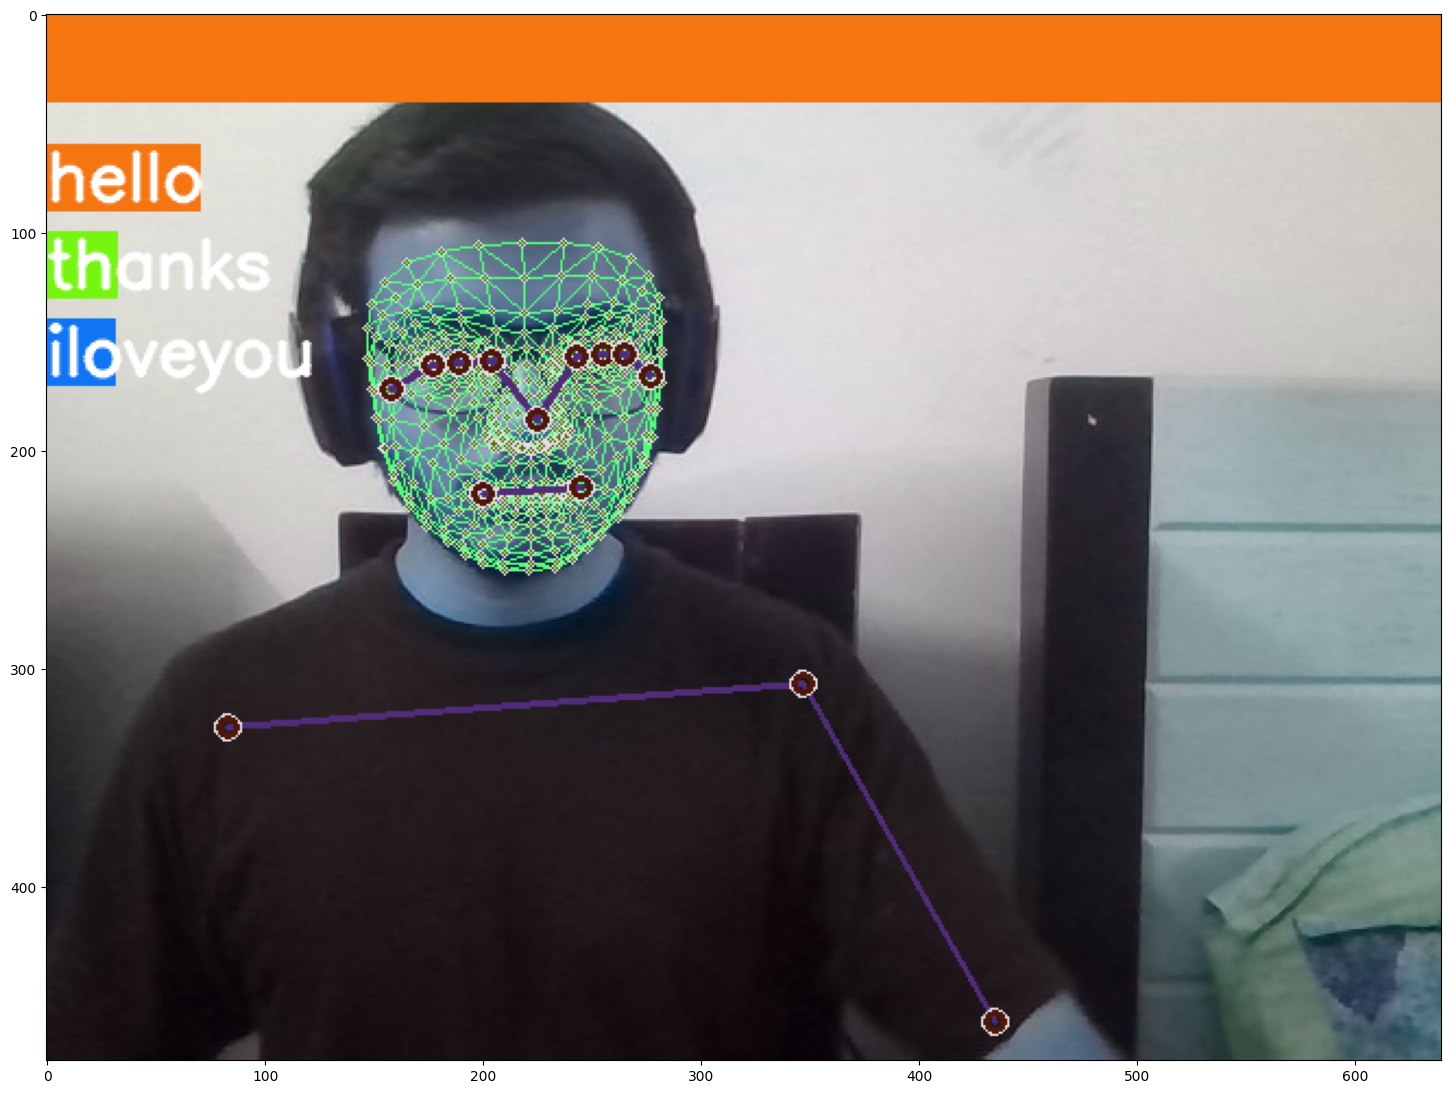

In [137]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [138]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

C:\Users\dhruv\AppData\Roaming\Python\Python311\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [139]:
cap.release()
cv2.destroyAllWindows()

In [140]:
res[np.argmax(res)] > threshold

True

In [141]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [142]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[0.0000000e+00, 5.9429017e-35, 1.0000000e+00]], dtype=float32)